<a href="https://colab.research.google.com/github/vitoriamsj/portfolio_data_science/blob/main/Analisando_a_Viol%C3%AAncia_no_Rio_de_Janeiro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analisando a Violência no Rio de Janeiro

<center><img alt="Rio de Janeiro" width="40%" src="https://image.freepik.com/free-vector/brazilian-pattern-colorful-style_1015-216.jpg"></center>

Não é de hoje que a violência do Rio se torna manchetes de jornais e revistas. 

De acordo com dados de 2008 do Ministério da Justiça, o Rio de Janeiro é o quinto estado brasileiro com maior taxa de homicídios, com 33 mortes para cada grupo de 100 mil habitantes, ficando atrás de Alagoas (66,2), Espírito Santo (56,7), Pernambuco (48,5) e Pará (39,8). Porém, por ser uma das maiores cidades turísticas do país, isso se torna um fato muito alarmante.

Através da base de dados disponibilizada pelo governo do Rio de Janeiro [portal ISPDados](http://www.ispdados.rj.gov.br/), faremos uma análise em cima dos indicadores estatísticos da violência no Rio, explorando algumas das variáveis fornecidas.



## Obtenção dos Dados


Os dados foram obtidos diretamento do portal ISPDados, que é uma página de Dados Abertos do Instituto de Segurança Pública do Rio de Janeiro.

As estatísticas divulgadas no portal são construídas a partir dos Registros de Ocorrência (RO) lavrados nas delegacias de Polícia Civil do Estado do Rio de Janeiro, além de informações complementares de órgãos específicos da Polícia Militar do Estado do Rio de Janeiro.

Como forma de criar um controle de qualidade, antes de serem consolidados no ISP os RO são submetidos à Corregedoria Interna da Polícia Civil (COINPOL). As estatísticas produzidas baseiam-se na data em que foi confeccionado o Registro de Ocorrência.



### Importando os dados

In [2]:
#Importar os dados

import pandas as pd
import numpy as np

df = pd.read_csv('https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/violencia_rio.csv')

## Análise Inicial dos Dados

Antes de começarmos a explorar nosso dataset, é preciso saber com o que estamos lidando. Para começarmos a entender melhor esse aspecto, vamos verificar as dimensões do dataset.

Ele possui 344 linhas e 56 colunas.


In [ ]:
#Tamanho do Data Frame (Linhas e Colunas)#

df.shape


(344, 56)

Podemos observar que existem dois tipos de variáveis dentre as 56 colunas (`int` e `float`).

In [ ]:
#Nome das Colunas e seus tipos de variáveis"

df.dtypes

vano                            int64
mes                             int64
hom_doloso                      int64
lesao_corp_morte              float64
latrocinio                      int64
hom_por_interv_policial       float64
tentat_hom                      int64
lesao_corp_dolosa               int64
estupro                       float64
hom_culposo                   float64
lesao_corp_culposa            float64
roubo_comercio                  int64
roubo_residencia                int64
roubo_veiculo                   int64
roubo_carga                     int64
roubo_transeunte                int64
roubo_em_coletivo               int64
roubo_banco                     int64
roubo_cx_eletronico           float64
roubo_celular                 float64
roubo_conducao_saque          float64
roubo_apos_saque              float64
roubo_bicicleta               float64
outros_roubos                   int64
total_roubos                    int64
furto_veiculos                  int64
furto_transe

Ao inserir as primeiras 5 entradas, podemos observar que diversas colunas possuem valores vazios, como por exemplo a coluna *lesao_corp_morte* e *hom_por_interv_policial*.

In [ ]:
#5 primeiras entradas#

df.head()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
0,1991,1,657,NaN,15,NaN,162,3051,NaN,NaN,NaN,350,188,1174,63,967,381,37,NaN,NaN,NaN,NaN,NaN,158,3318,2009,1147,NaN,NaN,NaN,3561,6717,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,872,NaN,NaN,NaN,NaN,NaN,NaN,217,NaN,NaN,NaN,672,1348,1174,NaN,3
1,1991,2,732,NaN,17,NaN,175,3421,NaN,NaN,NaN,357,171,1097,64,963,432,35,NaN,NaN,NaN,NaN,NaN,142,3261,1850,1066,NaN,NaN,NaN,3309,6225,NaN,NaN,NaN,NaN,127,NaN,NaN,NaN,751,NaN,NaN,NaN,NaN,NaN,NaN,209,NaN,NaN,NaN,749,1395,1097,NaN,3
2,1991,3,713,NaN,25,NaN,216,3613,NaN,NaN,NaN,443,191,1265,71,963,422,43,NaN,NaN,NaN,NaN,NaN,131,3529,2084,1062,NaN,NaN,NaN,3573,6719,NaN,NaN,NaN,NaN,80,NaN,NaN,NaN,789,NaN,NaN,NaN,NaN,NaN,NaN,188,NaN,NaN,NaN,738,1385,1265,NaN,3
3,1991,4,634,NaN,20,NaN,200,3211,NaN,NaN,NaN,425,199,1415,81,1186,354,36,NaN,NaN,NaN,NaN,NaN,112,3808,2085,1195,NaN,NaN,NaN,3290,6570,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,787,NaN,NaN,NaN,NaN,NaN,NaN,140,NaN,NaN,NaN,654,1540,1415,NaN,3
4,1991,5,650,NaN,20,NaN,146,3051,NaN,NaN,NaN,553,231,1449,82,931,335,27,NaN,NaN,NaN,NaN,NaN,147,3755,2185,723,NaN,NaN,NaN,3546,6454,NaN,NaN,NaN,NaN,163,NaN,NaN,NaN,845,NaN,NaN,NaN,NaN,NaN,NaN,78,NaN,NaN,NaN,670,1266,1449,NaN,3


Portanto, vamos identificar qual a porcentagem de valores ausentes em cada coluna.

In [ ]:
#% de Valores ausentes em cada coluna

((df.isnull().sum() / df.shape[0])*100).sort_values(ascending=False)

roubo_bicicleta               80.232558
furto_bicicleta               80.232558
apreensao_drogas_sem_autor    52.325581
posse_drogas                  52.325581
apf                           52.325581
aaapai                        52.325581
cmp                           52.325581
trafico_drogas                52.325581
cmba                          52.325581
sequestro_relampago           41.860465
furto_coletivo                41.860465
extorsao                      41.860465
furto_celular                 41.860465
roubo_apos_saque              41.860465
roubo_conducao_saque          41.860465
roubo_cx_eletronico           41.860465
estupro                       41.860465
estelionato                   41.860465
pol_civis_mortos_serv         41.860465
pol_militares_mortos_serv     41.860465
pessoas_desaparecidas         38.372093
encontro_ossada               38.372093
roubo_celular                 31.395349
lesao_corp_culposa            27.906977
ameaca                        27.906977


Acima, podemos ver que algumas das variáveis tem valores faltantes em proporções consideráveis, como é o exemplo de crimes relacionados a bicicletas (roubos e furtos) e apreensão de drogas.

Como os dados estão estruturados ao longo do tempo podemos analisá-los a partir da data em que começaram a ser registrados.

Além disso, existem outras formas de encararmos e explorarmos os dados, como por exemplo:

* Números anuais por crime.
* Números mensais por crime.
* Categorias de crimes (Contra a vida, Contra o patrimônio, etc.)


## Informações Estatísticas da Violência no Rio de Janeiro


Usando o método `describe()` podemos visualizar a distribuição estatística do dataframe.

Utilizando esse método, temos informações que podem nos ajudar a:

* Identificar outliers.
* Entender melhor a distribuição dos dados.
* Identificar falhas na distribuição dos dados.
* Após a limpeza dos dados, verificar a eficácia e as diferenças entre os dados tratados e não tratados.

In [ ]:
#Resultado Estatístico

df.describe()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
count,344.000000,344.000000,344.000000,248.000000,344.000000,260.00000,344.000000,344.000000,200.000000,260.000000,248.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,200.000000,236.000000,200.000000,200.000000,68.000000,344.000000,344.000000,344.000000,344.000000,200.000000,200.000000,68.000000,344.000000,344.000000,248.000000,200.000000,200.000000,200.000000,344.000000,164.000000,164.000000,164.000000,344.000000,164.000000,164.000000,164.000000,164.000000,248.000000,212.000000,344.000000,212.000000,200.000000,200.00000,344.000000,344.000000,344.000000,248.000000,344.000000
mean,2004.837209,6.453488,504.555233,4.334677,15.668605,71.90000,318.267442,5492.799419,369.945000,212.119231,3410.762097,455.005814,133.284884,2448.697674,340.322674,3418.520349,659.002907,9.375000,3.550000,957.974576,11.320000,145.665000,10.808824,1211.223837,9428.119186,1674.671512,1518.921512,650.230000,1449.175000,124.808824,5994.328488,10433.177326,0.665323,133.265000,7.755000,2231.860000,1071.930233,609.237805,759.146341,186.146341,1772.238372,2319.585366,568.628049,1255.512195,83.042683,5530.326613,435.132075,66.261628,3.301887,2.085000,0.34000,577.691860,4734.738372,2448.697674,53794.161290,2.994186
std,8.289036,3.447759,113.774481,2.755357,5.861427,36.48882,127.606645,1514.220579,94.392434,54.234700,776.156561,119.765076,44.317963,789.689559,223.855243,2459.017549,297.622342,10.564894,2.634808,624.309034,6.404113,55.392367,7.767628,800.576723,4578.013053,294.852020,971.853102,268.836273,368.638776,80.247427,1964.767779,3696.725756,0.959128,43.303821,5.089646,772.093064,643.381991,246.307700,312.871487,36.221243,656.761843,650.520866,248.040620,357.035450,62.951374,1100.752625,65.353516,34.464519,2.192922,1.761616,0.63752,104.973929,3204.054864,789.689559,11039.051992,0.076138
min,1991.000000,1.000000,272.000000,0.000000,2.000000,10.00000,122.000000,2350.000000,188.000000,111.000000,848.000000,243.000000,49.000000,1097.000000,59.000000,688.000000,281.000000,0.000000,0.000000,0.000000,1.000000,11.000000,0.000000,81.000000,3261.000000,1159.000000,322.000000,23.000000,484.000000,0.000000,2322.000000,4691.000000,0.000000,23.000000,0.000000,717.000000,80.000000,248.000000,262.000000,114.000000,729.000000,1173.000000,225.000000,628.000000,21.000000,1409.000000,236.000000,0.000000,0.000000,0.000000,0.00000,334.000000,1086.000000,1097.000000,30621.000000,2.000000
25%,1998.000000,3.000000,413.750000,2.000000,11.000000,41.75000,200.000000,4067.000000,282.000000,176.000000,3040.000000,365.750000,103.750000,1889.750000,208.250000,1053.000000,430.750000,2.000000,2.000000,549.750000,6.000000,106.000000,2.250000,811.750000,5107.750000,1430.500000,732.000000,501.000000,1297.000000,3.750000,3978.000000,6700.250000,0.000000,109.750000,4.750000,1654.500000,714.500000,360.500000,426.000000,160.000000,1276.750000,1681.000000,332.500000,950.500000,46.000000,4868.500000,390.000000,42.000000,2.000000,1.000000,0.00000,500.000000,1557.000000,1889.750000,45374.500000,3.000000
50%,2005.000000,6.000000,507.000000,4.000000,15.000000,70.00000,318.500000,5830.500000,384.000000,203.000000,3372.000000,433.500000,125.000000,2322.000000

Vamos identificar as médias das seguintes colunas, a fim de investigar dados em relação aos crimes de roubo e furto de veículos:
 
  * `roubo_veiculo`
  * `furto_veiculos`
  * `recuperacao_veiculos`

In [ ]:
#Média de roubo de veículos
mean_roubo_veiculo = df.roubo_veiculo.mean()
print(round(mean_roubo_veiculo,2))

2448.7


Acima podemos ver que a média de roubos é de 2448 por mês.

In [ ]:
#Média de furto de veículos
mean_furto_veiculo = df.furto_veiculos.mean()
print(round(mean_furto_veiculo,2))

1674.67


Já a média de furtos é de 1674 veículos por mês.

In [ ]:
#Média de recuperação dos veículos
mean_recuperacao_veiculo = df.recuperacao_veiculos.mean()
print(round(mean_recuperacao_veiculo,2))

1772.24


Iremos agora calcular o total de carros perdidos e a % de veículos recuperados.

In [ ]:
#Total de veículos perdidos
total = mean_roubo_veiculo + mean_furto_veiculo
print ('Média de veículos perdidos por Mês: {:.2f}'.format(total))
print ('Veículos Recuperados por Mês: {:.2f}'.format(mean_recuperacao_veiculo))

# % Veículos recuperados
pct = (mean_recuperacao_veiculo/total)*100
print ('Concluimos que {:.2f}% dos veículos roubados ou furtados são recuperados.'.format(pct))

Média de veículos perdidos por Mês: 4123.37
Veículos Recuperados por Mês: 1772.24
Concluimos que 42.98% dos veículos roubados ou furtados são recuperados.


Vamos verificar agora a quantidade de homicidios dolosos (`hom_doloso`), seus valores máximos e mínimos.

In [ ]:
#Valores máx e mín da coluna hom_doloso

maximo = df.hom_doloso.max()
minimo = df.hom_doloso.min()
print ('O valor máximo de homcídio doloso é de {}, e o valor mínimo é de {}.'.format(maximo,minimo))

O valor máximo de homcídio doloso é de 831, e o valor mínimo é de 272.


Acima podemos ver que no mês com menor número de casos foram registrados 272 homicídios dolosos.

Em relação ao mês com números mais elevado, houveram 831 homicídios dolosos.

Vamos investigar um pouco mais a fundo essas entradas.

In [ ]:
#Mês com menor hom_doloso == 272

df[df.hom_doloso==272]

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
293,2015,6,272,2.0,16,44.0,477,5535,389.0,140.0,3369.0,465,96,2254,566,4421,619,3,1.0,896.0,5.0,106.0,3.0,1243,10678,1333,2974,968.0,1514.0,5.0,7475,14269,0.0,192.0,10.0,2940.0,2134,845.0,1134.0,204.0,1768,3128.0,798.0,1676.0,57.0,5678.0,493.0,52,4.0,1.0,1.0,334,5936,2254,60357.0,3


In [ ]:
#Mês com maior hom_doloso = 831

df[df.hom_doloso==831]

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
48,1995,1,831,NaN,17,NaN,166,3626,NaN,NaN,NaN,323,174,2060,188,1056,377,38,NaN,NaN,NaN,NaN,NaN,134,4350,1924,520,NaN,NaN,NaN,2941,5385,NaN,NaN,NaN,NaN,147,NaN,NaN,NaN,1435,NaN,NaN,NaN,NaN,NaN,NaN,98,NaN,NaN,NaN,848,1433,2060,NaN,3


In [ ]:
#Quantidade de homicídios dolosos por ano
df.groupby(['vano']).hom_doloso.sum().sort_values(ascending=False)


vano
1995    8438
1994    8408
1993    7720
1992    7635
1991    7518
1996    7259
1997    6923
2002    6885
2003    6624
2005    6620
2004    6438
2006    6323
2000    6287
2001    6163
2007    6133
1999    5888
2009    5793
1998    5726
2008    5717
2017    5346
2016    5042
2018    4950
2014    4942
2010    4767
2013    4745
2011    4279
2015    4200
2012    4081
2019    2717
Name: hom_doloso, dtype: int64

Acima, vemos que o mês de Janeiro de 1995 foi o mês com mais casos de homicídios dolosos registrados no nosso dataset, enquanto o posto de mês com menor número de casos foi Junho de 2015.

O ano com mais casos foi o de 1995, e o menor foi o de 2019.

Isso pode indicandar que, talvez, o crime venha diminuindo. Apenas uma análise mais aprofundada pode nos dizer.

## Visualização de Dados




Um histograma consiste em uma representação gráfica de dados que são divididos em classes. Assim, esta representação gráfica é feita com o objetivo de conferir como um processo se comporta em relação a suas especificidades.

Vamos analisar o histograma da coluna `hom_doloso`.

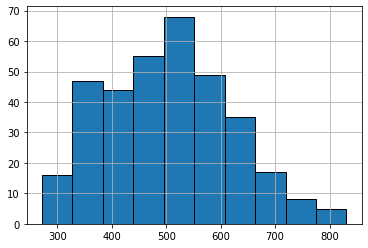

In [27]:
df.hom_doloso.hist(bins=10, edgecolor='black');

No gráfico acima o eixo x representa a quantidade de homícidios dolosos e o eixo y indica a quantidade de meses. 
Podemos inferir que:
 * 70 meses registraram 500-550 homícidios dolosos;
 * Houveram menos de 10 meses ao longo de todo o período estudado na casa de 800 registros de homicídio doloso;


O tráfico se tornou um crime organizado no Rio de Janeiro a partir da décadad e 70. Especiais da polícia militar dizem que a cidade virou um ponto na rota de distribuição da cocaína, que saía dos países andinos, em direção à Europa. À medida que a produção crescia nesses países, aumentava a oferta da droga dentro da cidade, e o preço diminuia para o usuário.

Vamos analisar a variávél `trafico_drogas`.

In [4]:
df.trafico_drogas.describe()

count     164.000000
mean      759.146341
std       312.871487
min       262.000000
25%       426.000000
50%       815.000000
75%      1045.250000
max      1282.000000
Name: trafico_drogas, dtype: float64

A média de trafico de drogas no estado do Rio é de 759 por ano. Porém, vamos analisar mais profundamente.

In [6]:
df.groupby(['vano']).trafico_drogas.sum().sort_values(ascending=False)

vano
2015    13961.0
2016    13256.0
2014    12428.0
2017    12173.0
2018    12034.0
2013    11600.0
2012     8917.0
2019     8449.0
2011     7505.0
2010     6462.0
2009     5242.0
2007     4196.0
2006     4143.0
2008     4134.0
1998        0.0
1992        0.0
1993        0.0
1994        0.0
1995        0.0
1996        0.0
1997        0.0
2005        0.0
1999        0.0
2000        0.0
2001        0.0
2002        0.0
2003        0.0
2004        0.0
1991        0.0
Name: trafico_drogas, dtype: float64

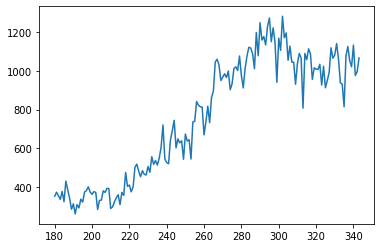

In [16]:
df.trafico_drogas.plot();

Podemos observar que o tráfico de drogas continua crescente no estado, porém comparando o ano mais atual com o registro mais alto, temos uma diferença de 5512 registros.

Isso indica que o tráfico no rio continua sendo um grande fator disseminativo da violência do Estado.

Vamos verificar a correlação entre as colunas `pessoas desaparecidas` e `encontro_cadaver`.





# Vamos entender a diferença entre roubo e furto:

**Furto** é a subtração de algo móvel pertencente a outra pessoa para si ou para outrem. Caracteriza-se pela ação de tirar de outra pessoa algo móvel que lhe pertença, sem a sua permissão, com o objetivo de domínio definitivo do bem.

Já o **roubo** pode ser considerado um crime mais grave do que o furto, isto porque a ação principal é a mesma, ou seja, tirar de alguém um bem móvel. Contudo, no roubo para a subtração do bem há o emprego de grave ameaça ou violência contra a pessoa, ou por qualquer outro meio que reduza a capacidade de resistência da vítima.

A seguir vamos fazer um comparativo do número de roubos e furtos no estado.


In [23]:
#Total de Furtos
total_furtos = (df.furto_bicicleta + df.furto_celular + df.furto_coletivo + df.furto_transeunte + df.furto_veiculos).sum()
total_furtos

408387.0

In [37]:
# Media de Furtos
mean_furtos = (df.furto_bicicleta + df.furto_celular + df.furto_coletivo + df.furto_transeunte + df.furto_veiculos).mean()
print(round(mean_furtos,2))

6005.69


In [26]:
#Total de roubos
total_roubos = (df.roubo_bicicleta + df.roubo_celular + df.roubo_veiculo + df.roubo_em_coletivo + df.roubo_transeunte).sum()
total_roubos

890282.0

In [38]:
# Media de Roubos
mean_roubos = (df.roubo_bicicleta + df.roubo_celular + df.roubo_veiculo + df.roubo_em_coletivo + df.roubo_transeunte).mean()
print(round(mean_roubos,2))

13092.38


Podemos observar que o número de roubos no estado é maior que o dobro do número de furtos. Isso pode ser mais um fator que indique que a violência no rio continua constante e perigosa.

# Conclusão

Foi feita apenas uma análise superficial na base de dados, porém já se percebeu que a violência no rio continua crescente.

Também se notou que mesmo havendo uma diminuição dos homicídios dolosos, as outras 'modalidades' de violência continuam crescendo. 

Por fim, lembra-se que este dataset é uma versão resumida, ideal apenas para uma abordagem inicial.